### Import nesscessary package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import math

### Load data from file csv PNJ and SJC gold price

In [3]:
df_sjc = pd.read_csv('data/SJC.csv',index_col=0)
df_pnj = pd.read_csv('data/PNJ.csv',index_col=0)
# df_sjc = df_sjc.drop(columns='type')
df_sjc['date'] = pd.to_datetime(df_sjc['date'])
df_pnj['date'] = pd.to_datetime(df_pnj['date'])

In [133]:
df_sjc.head()

,buy,sell,date
Unnamed: 0,,,
0,36.82,36.65,2014-06-23
28,36.83,36.73,2014-06-24
44,36.84,36.76,2014-06-25
58,36.80,36.65,2014-06-26
74,36.80,36.71,2014-06-27


In [134]:
df_pnj.head()

,buy,sell,date
Unnamed: 0,,,
1,34.30,34.10,2014-06-23
18,34.35,34.15,2014-06-24
38,34.45,34.25,2014-06-25
52,34.43,34.23,2014-06-26
66,34.45,34.25,2014-06-27


In [135]:
print("Summary statistics of gold prices:\n", df_sjc.drop(columns='date').describe())

Summary statistics of gold prices:
                buy         sell
count  3042.000000  3042.000000
mean     48.237804    47.736542
std      14.847297    14.455876
min      32.800000    32.350000
25%      36.450000    36.250000
50%      37.750000    37.380000
75%      61.300000    60.537500
max      91.300000    88.900000


In [136]:
print("Summary statistics of gold prices:\n", df_pnj.drop(columns='date').describe())

Summary statistics of gold prices:
                buy         sell
count  3042.000000  3042.000000
mean     44.162564    43.459310
std      11.101258    10.779329
min      29.850000    29.500000
25%      34.832500    34.390000
50%      37.890000    37.350000
75%      54.000000    53.100000
max      77.600000    75.700000


## What heighest gold price of PNJ and SJC

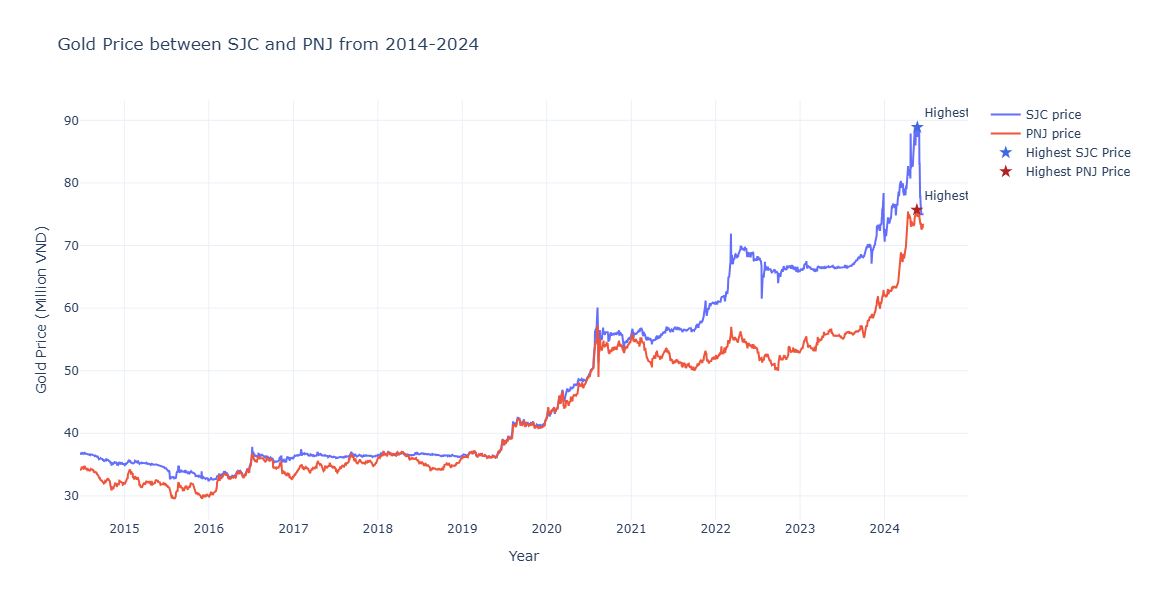

In [137]:
# Find the highest price for SJC and PNJ
max_price_sjc = df_sjc['sell'].max()
max_price_pnj = df_pnj['sell'].max()

# Get the dates for the highest prices
max_date_sjc = df_sjc[df_sjc['sell'] == max_price_sjc]['date'].iloc[0]
max_date_pnj = df_pnj[df_pnj['sell'] == max_price_pnj]['date'].iloc[0]

# Create the plot
fig = go.Figure()

# Add traces for SJC and PNJ
fig.add_trace(go.Scatter(x=df_sjc['date'], y=df_sjc['sell'], mode='lines', name='SJC price'))
fig.add_trace(go.Scatter(x=df_pnj['date'], y=df_pnj['sell'], mode='lines', name='PNJ price'))

# Add annotations for the highest prices
fig.add_trace(go.Scatter(
    x=[max_date_sjc], y=[max_price_sjc], mode='markers+text', name='Highest SJC Price',
    marker=dict(size=10, color='royalblue', symbol='star'),
    text=[f'Highest: {max_price_sjc}'],
    textposition='top right'
))

fig.add_trace(go.Scatter(
    x=[max_date_pnj], y=[max_price_pnj], mode='markers+text', name='Highest PNJ Price',
    marker=dict(size=10, color='firebrick', symbol='star'),
    text=[f'Highest: {max_price_pnj}'],
    textposition='top right'
))

# Update layout
fig.update_layout(
    title='Gold Price between SJC and PNJ from 2014-2024',
    xaxis_title='Year',
    yaxis_title='Gold Price (Million VND)',
    xaxis=dict(
        tickformat='%Y',
        tickmode='linear',
        dtick='M12', # Set tick interval to 1 year
    ),
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

**2014-2016: Gold prices experienced a continuous decline for two consecutive years, 2016-2018: Gold prices entered a consolidation phase, characterized by relatively stable prices, 2019: Gold prices reached their peak for this period, driven by various factors, 2020-2022: Gold prices witnessed a surge due to the combined impact of the COVID-19 pandemic, geopolitical tensions, and economic uncertainties, 2024 and beyond: Gold prices are expected to continue their upward trend if global economic instability persists.**

## Comapare gold price between PNJ and SJC
What is the highest different between them and what is higher? -> Why

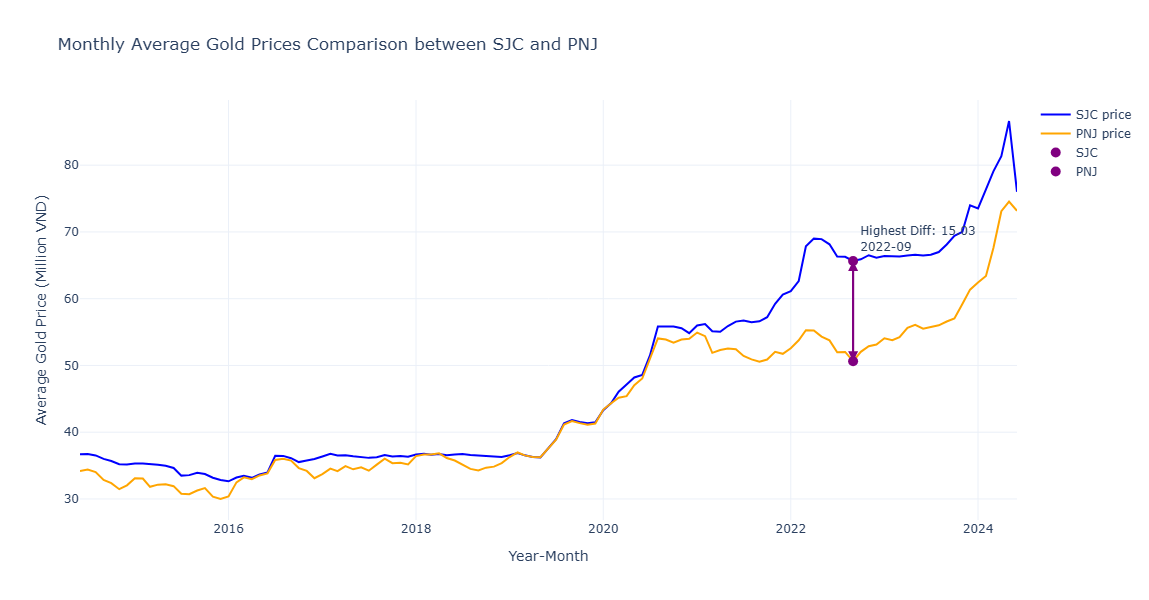

In [138]:
# Calculate year and month columns
df_sjc['year_month'] = df_sjc['date'].dt.to_period('M').astype(str)  # Convert Period to string
df_pnj['year_month'] = df_pnj['date'].dt.to_period('M').astype(str)  # Convert Period to string

# Group by year and month, calculate mean sell price
df_sjc_monthly = df_sjc.groupby('year_month')['sell'].mean().reset_index()
df_pnj_monthly = df_pnj.groupby('year_month')['sell'].mean().reset_index()

# Merge dataframes to find differences
df_diff = pd.merge(df_sjc_monthly, df_pnj_monthly, on='year_month', suffixes=('_sjc', '_pnj'))
df_diff['difference'] = df_diff['sell_sjc'] - df_diff['sell_pnj']

# Find the month with the highest difference
max_diff_row = df_diff.loc[df_diff['difference'].idxmax()]

# Create the plot
fig = go.Figure()

# Add traces for SJC and PNJ monthly average prices
fig.add_trace(go.Scatter(x=df_sjc_monthly['year_month'], y=df_sjc_monthly['sell'], mode='lines', name='SJC price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_pnj_monthly['year_month'], y=df_pnj_monthly['sell'], mode='lines', name='PNJ price', line=dict(color='orange')))

# Highlight the month with the highest difference
fig.add_trace(go.Scatter(
    x=[max_diff_row['year_month']],
    y=[max_diff_row['sell_sjc']],
    mode='markers+text',
    name='SJC',
    marker=dict(size=10, color='purple'),
    text=[f'Highest Diff: {max_diff_row["difference"]:.2f}<br>{max_diff_row["year_month"]}'],
    textposition='top right'
))

fig.add_trace(go.Scatter(
    x=[max_diff_row['year_month']],
    y=[max_diff_row['sell_pnj']],
    mode='markers',
    name='PNJ',
    marker=dict(size=10, color='purple'),
    # text=[f'Highest Diff: {max_diff_row["difference"]:.2f}<br>{max_diff_row["year_month"]}'],
    textposition='top left'
))

# Draw a bidirectional arrow
fig.add_annotation(
    x=max_diff_row['year_month'],
    y=max_diff_row['sell_sjc'],
    ax=max_diff_row['year_month'],
    ay=max_diff_row['sell_pnj'],
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='purple'
)

fig.add_annotation(
    x=max_diff_row['year_month'],
    y=max_diff_row['sell_pnj'],
    ax=max_diff_row['year_month'],
    ay=max_diff_row['sell_sjc'],
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='purple'
)
# Update layout
fig.update_layout(
    title='Monthly Average Gold Prices Comparison between SJC and PNJ',
    xaxis_title='Year-Month',
    yaxis_title='Average Gold Price (Million VND)',
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

## Find the gold price range with the highest probability of occurrence

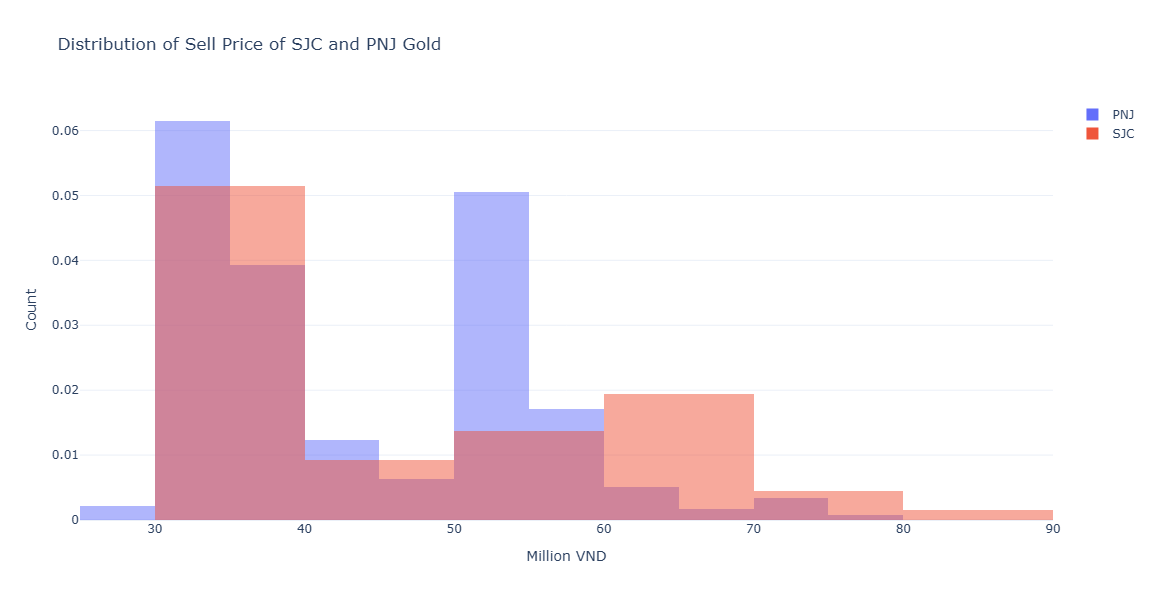

In [139]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_pnj['sell'],name='PNJ',nbinsx=10,histnorm='probability density'))
fig.add_trace(go.Histogram(x=df_sjc['sell'],name='SJC',nbinsx=10,histnorm='probability density'))
# The two histograms are drawn on top of another
fig.update_layout(
    barmode='overlay',
    title='Distribution of Sell Price of SJC and PNJ Gold',
    xaxis_title='Million VND',
    yaxis_title='Count',
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)
fig.update_traces(overwrite=True, marker={"opacity": 0.5}) 
fig.show()

**30-35 for PNJ and 35-40 for SJC**

## SJC Gold Price per Year and Quarter chart

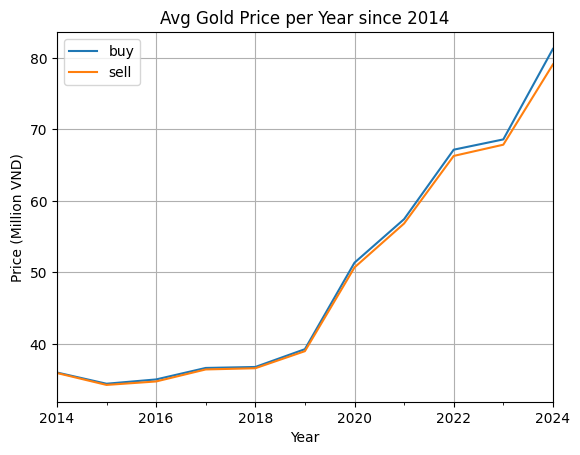

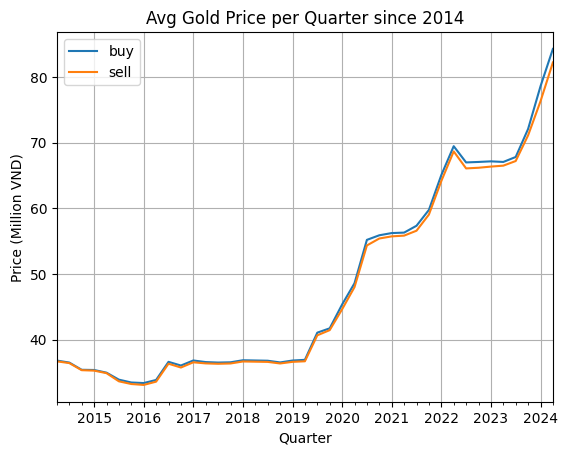

In [142]:
df = pd.read_csv('data/SJC.csv',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = df
df.set_index('date', inplace=True)
df_yearly_sum = df.resample('YE').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 2014')
plt.xlabel('Year')
plt.ylabel('Price (Million VND)')
plt.grid()

df_quarterly_sum = df.resample('QE').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 2014')
plt.xlabel('Quarter')
plt.ylabel('Price (Million VND)')
plt.grid()


## Box plot for each year of SJC gold 

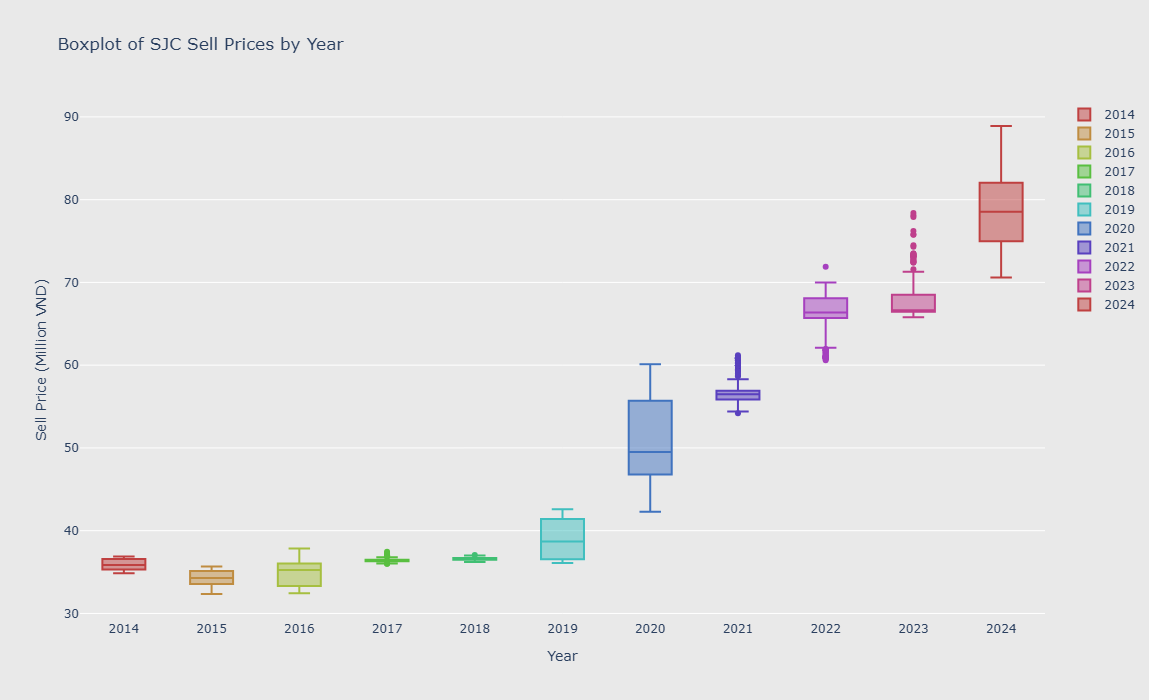

In [143]:
# Convert 'Date' column to datetime
df_sjc['date'] = pd.to_datetime(df_sjc['date'])

# Extract year from 'Date' column
df_sjc['year'] = df_sjc['date'].dt.year

# Number of years in the dataset
N = 2024 - 2014 + 1

# Generate an array of rainbow colors
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Create the box plot using Plotly Graph Objects
fig = go.Figure()

for year, color in zip(df_sjc['year'].unique(), c):
    fig.add_trace(go.Box(
        y=df_sjc[df_sjc['year'] == year]['sell'],
        name=str(year),
        marker_color=color
    ))

# Format the layout
fig.update_layout(
    title='Boxplot of SJC Sell Prices by Year',
    xaxis_title='Year',
    yaxis_title='Sell Price (Million VND)',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    width=1300,  # Set the width of the plot
    height=700   # Set the height of the plot
)

# Show plot
fig.show()
df_sjc = df_sjc.drop(columns='year')

**The years 2014, 2017, and 2018 had low gold price volatility, while 2020 saw a significant range between the minimum and maximum gold prices (17.8 million VND). The period from 2021 to 2023 experienced many fluctuations (with numerous outliers) due to COVID. As for 2024, it is still too early to make a full assessment since only half of the year has passed, but it is anticipated that gold prices will continue to fluctuate significantly. The gold price has already reached a record high of 89.9 million VND compared to the beginning of the year at 73 million VND `due to concerns over rising inflation and the escalating Ukraine-Russia war. Additionally, the U.S. Federal Reserve (Fed) may ease its monetary policy.`**

In [95]:
gw = pd.read_csv('data/gold_world_vnd.csv')
gw = gw.rename({'Date':'date'},axis=1)

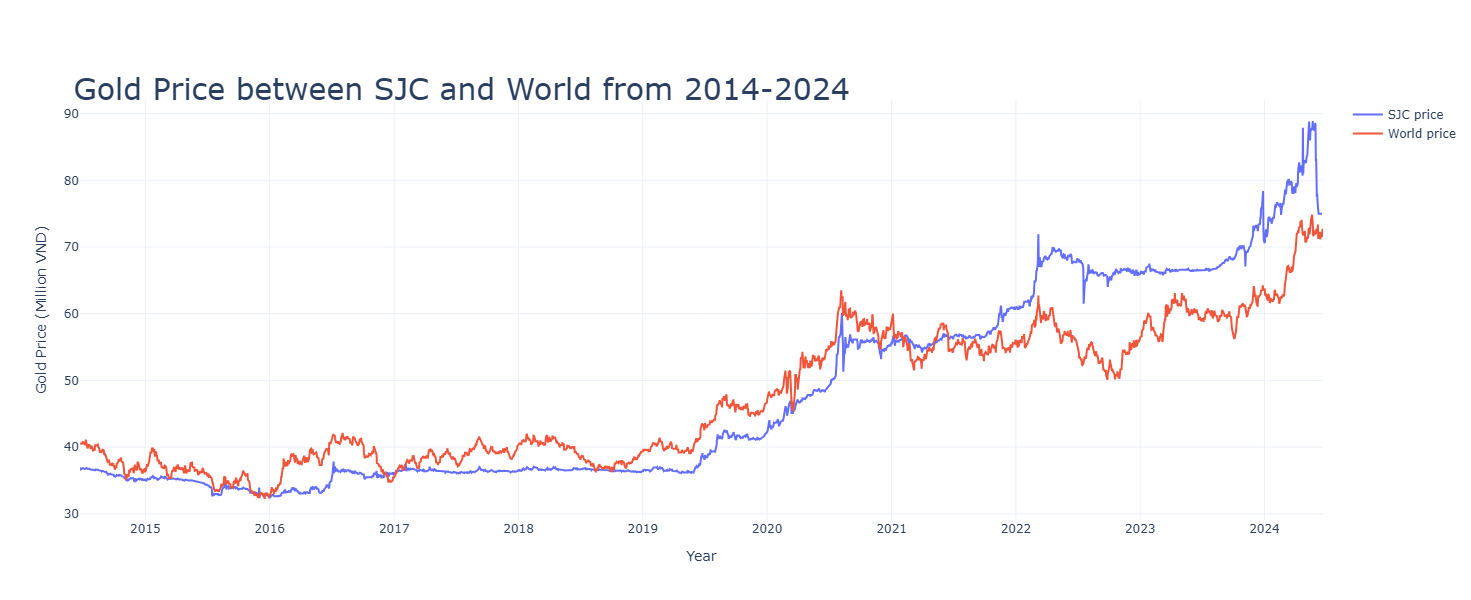

In [97]:
# Create the plot
fig = go.Figure()

# Add traces for SJC and PNJ
fig.add_trace(go.Scatter(x=df_sjc['date'], y=df_sjc['sell'], mode='lines', name='SJC price'))
fig.add_trace(go.Scatter(x=gw['date'], y=gw['sell'], mode='lines', name='World price'))

# Update layout
fig.update_layout(
    title=dict(text='Gold Price between SJC and World from 2014-2024', font=dict(size=30), automargin=True, yref='paper'),
    xaxis_title='Year',
    yaxis_title='Gold Price (Million VND)',
    xaxis=dict(
        tickformat='%Y',
        tickmode='linear',
        dtick='M12', # Set tick interval to 1 year
    ),
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

**The global gold price doesn't directly translate to the price of gold in Vietnam.**

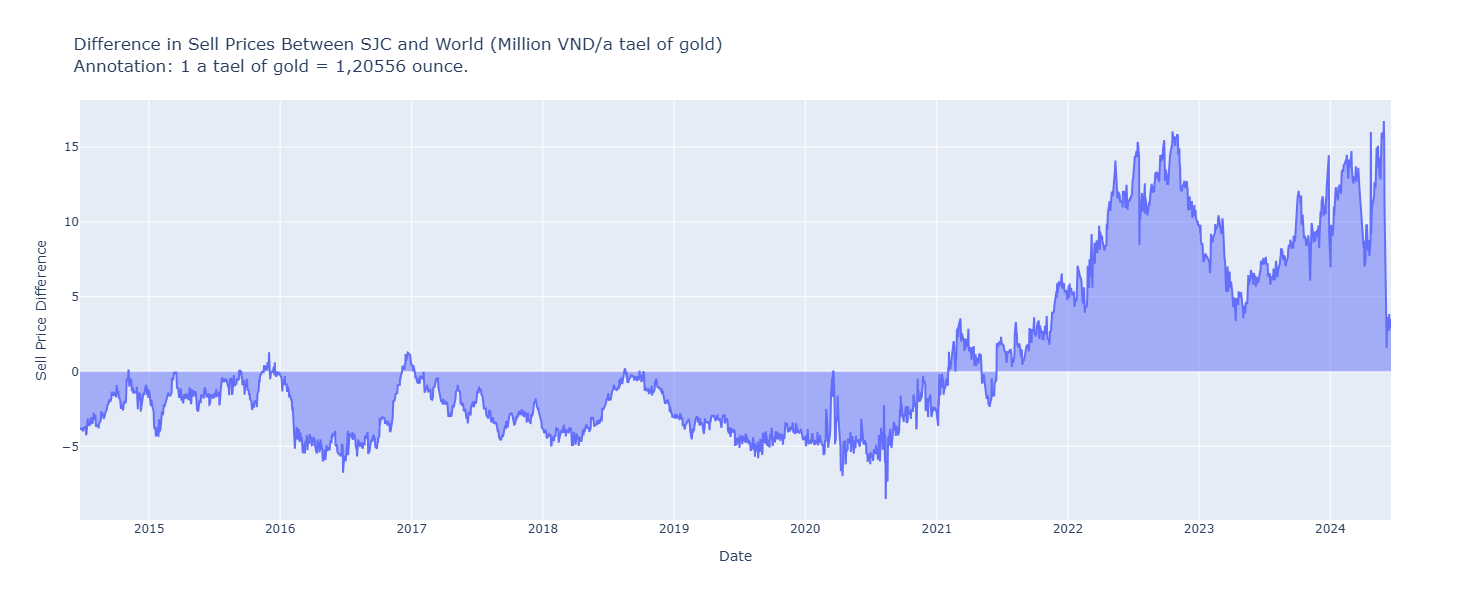

In [93]:
# Ensure the date columns are properly formatted
df_sjc['date'] = pd.to_datetime(df_sjc['date'])
gw['date'] = pd.to_datetime(gw['date'])
df_sjc1 = pd.DataFrame(df_sjc)
gw1 = pd.DataFrame(gw)
df_sjc1.set_index('date')
# print(gw1)
gw1.set_index('date')
merge=pd.merge(df_sjc1,gw1, how='inner', left_index=True, right_index=True)

# Print the DataFrames to inspect the dates
# print("df_sjc:")
# print(df_sjc1)
# print("gw:")
# print(gw1)

merged_df = pd.merge(df_sjc1, gw1, on='date', suffixes=('_sjc', '_gw'))

# Calculate the difference
if not merged_df.empty:
    merged_df['sell_diff'] = merged_df['sell_sjc'] - merged_df['sell_gw']

    # Plot the data
    fig = px.area(merged_df, x='date', y='sell_diff', title='Difference in Sell Prices Between SJC and World (Million VND/a tael of gold)<br>Annotation: 1 a tael of gold = 1,20556 ounce.', facet_col_wrap=2)

    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Sell Price Difference',
        width=1200,
        height=600
    )

    fig.show()
else:
    print("The merged DataFrame is empty. Check if the date ranges overlap and are correctly formatted.")

In [109]:
InflationRateVN ={'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],'InflationRate':[4.09,0.63,6.66,3.53,3.54,2.79,3.23,1.84,3.15,4.16,3.75]}
InflationRate_df = pd.DataFrame(InflationRateVN)

In [117]:
ExchangeRateVN ={'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],'ExchangeRate':[21.246 ,21.899,22.362,22.709,22.979,23.224,23.226,22.938,23.412,23.836,24.937]}
ExchangeRate_df = pd.DataFrame(ExchangeRateVN)

In [111]:
CPI ={'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],'CPI':[1.84 ,0.6, 4.74, 2.6, 2.98, 5.23, 0.19, 1.81, 4.55, 3.25, 4.03]}
CPI_df = pd.DataFrame(CPI)

In [112]:
years = {'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]}
mergedf = pd.DataFrame(years)
df_sjc1['year'] = df_sjc1['date'].dt.year

# Tính giá trung bình hàng năm
annual_avg_prices = df_sjc1.groupby('year')['sell'].mean()
mergedf['GoldPriceVN'] = annual_avg_prices.values

In [113]:
gw = pd.read_csv('data/gold_world_vnd.csv')
gw['Date']=pd.to_datetime(gw['Date'])
gw['year'] = gw['Date'].dt.year
annual_avg_prices_w = gw.groupby('year')['sell'].mean()
print(annual_avg_prices)

year
2014    35.913780
2015    34.245359
2016    34.730225
2017    36.411344
2018    36.581705
2019    38.970000
2020    50.691558
2021    56.840623
2022    66.299669
2023    67.870200
2024    79.100662
Name: sell, dtype: float64


In [118]:
vnindexdf = pd.read_csv('data/VN_Index.csv')
vnindexdf['date']=pd.to_datetime(vnindexdf['date'])
vnindexdf['year'] = vnindexdf['date'].dt.year
vnindexdf['closed'] = vnindexdf['closed'].str.replace(',', '').astype(float)
vnindexdf['closed']
annual_avg_prices_index = vnindexdf.groupby('year')['closed'].mean()

In [119]:
mergedf['GoldPriceWorld'] = annual_avg_prices_w.values
mergedf['ExchangeRate']=ExchangeRate_df['ExchangeRate']
mergedf['InflationRate']=InflationRate_df['InflationRate']
mergedf['VNIndex']=annual_avg_prices_index.values
mergedf['CPI']=CPI_df['CPI']

In [120]:
mergedf

,Year,GoldPriceVN,GoldPriceWorld,ExchangeRate,InflationRate,VNIndex,CPI
0,2014,35.913780,38.223619,21.246,4.09,583.107500,1.84
1,2015,34.245359,35.578319,21.899,0.63,579.402500,0.60
2,2016,34.730225,38.418782,22.362,6.66,627.770000,4.74
3,2017,36.411344,38.690630,22.709,3.53,792.048333,2.60
4,2018,36.581705,39.027914,22.979,3.54,1007.129167,2.98
5,2019,38.970000,42.881775,23.224,2.79,970.765000,5.23
6,2020,50.691558,54.605786,23.226,3.23,879.808333,0.19
7,2021,56.840623,55.229144,22.938,1.84,1316.423333,1.81
8,2022,66.299669,55.461837,23.412,3.15,1251.726667,4.55
9,2023,67.870200,59.975597,23.836,4.16,1108.193333,3.25


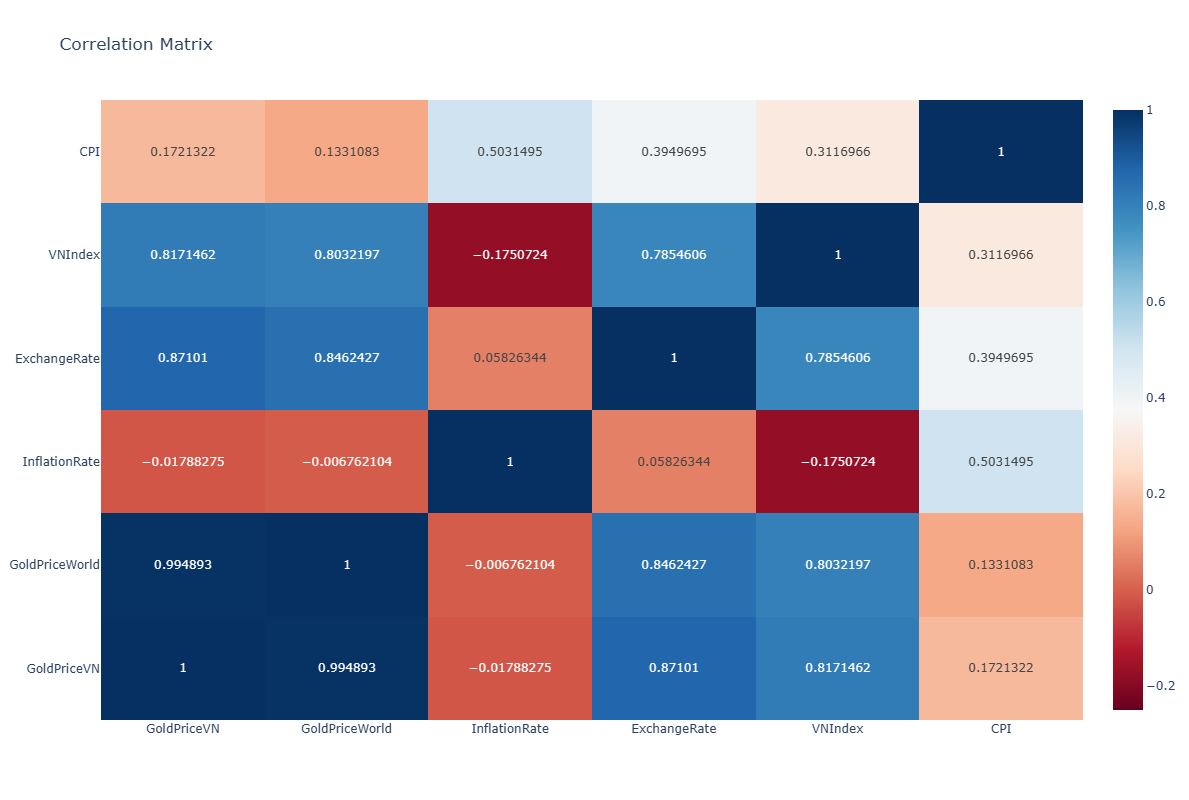

In [104]:
correlation_matrix = mergedf.drop(columns=['Year']).corr()
# Create a heatmap to visualize the correlation matrix using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale = 'RdBu',hoverongaps = False,
                   zmin = - 0.25, zmax=1,
                   texttemplate="%{z}"
                   ))

# Update layout
fig.update_layout(
    title='Correlation Matrix',
    xaxis_nticks=36,
    width=800,
    height=800
)

# Show plot
fig.show()